In [28]:
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
from ddgclib._complex import Complex
from data_levelset_geometric_shapes.extract_and_process_interface_points import read_data, \
    extract_and_save_unique_intersection_points, plot_intersection_points, plot_unique_intersections,\
    plot_and_save_levelset_points


In [2]:
filename = Path("../../ddgclib/data_levelset_geometric_shapes/sphere_fine/extraction_data_0.000000.txt")
result_folder = Path("../../ddgclib/data_levelset_geometric_shapes/X_intersections_sphere_fine")
plot_single_cells = False

# Create the result folder
if not os.path.exists(result_folder):
    os.mkdir(result_folder)

In [3]:
# Read and plot the data
corners_and_intersections = read_data(filename)
#unique_intersections = extract_and_save_unique_intersection_points(corners_and_intersections, result_folder)
#plot_and_save_levelset_points(corners_and_intersections, result_folder)
#plot_unique_intersections(unique_intersections, result_folder)
#plot_intersection_points(corners_and_intersections, result_folder, plot_single_cells)

Total number of cells          :  1760
Total number of intersections  :  7032
Total number of levelset points:  1760


In [7]:
corners_and_intersections

[{'Corners': array([[0.34375 , 0.5     , 0.4375  ],
         [0.359375, 0.5     , 0.4375  ],
         [0.359375, 0.515625, 0.4375  ],
         [0.34375 , 0.515625, 0.4375  ],
         [0.34375 , 0.5     , 0.453125],
         [0.359375, 0.5     , 0.453125],
         [0.359375, 0.515625, 0.453125],
         [0.34375 , 0.515625, 0.453125]]),
  'Intersections': array([[0.35795535, 0.5       , 0.453125  ],
         [0.35881421, 0.515625  , 0.453125  ],
         [0.359375  , 0.5       , 0.44938558],
         [0.359375  , 0.515625  , 0.45164748]]),
  'Levelset': array([[0.35942609, 0.50739815, 0.44821111]])},
 {'Corners': array([[0.34375 , 0.5     , 0.453125],
         [0.359375, 0.5     , 0.453125],
         [0.359375, 0.515625, 0.453125],
         [0.34375 , 0.515625, 0.453125],
         [0.34375 , 0.5     , 0.46875 ],
         [0.359375, 0.5     , 0.46875 ],
         [0.359375, 0.515625, 0.46875 ],
         [0.34375 , 0.515625, 0.46875 ]]),
  'Intersections': array([[0.35795535, 0.5       

In [8]:
len(corners_and_intersections)

1760

In [27]:
corners_and_intersections[0].keys()

dict_keys(['Corners', 'Intersections', 'Levelset'])

In [15]:
for c in corners_and_intersections:
    if len(c['Intersections']) > 6:
        print('AHHHH!')

In [33]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    for xi in c['Intersections']:
        #HC.V(xi)
        X.append(xi)
        
X = np.array(X)

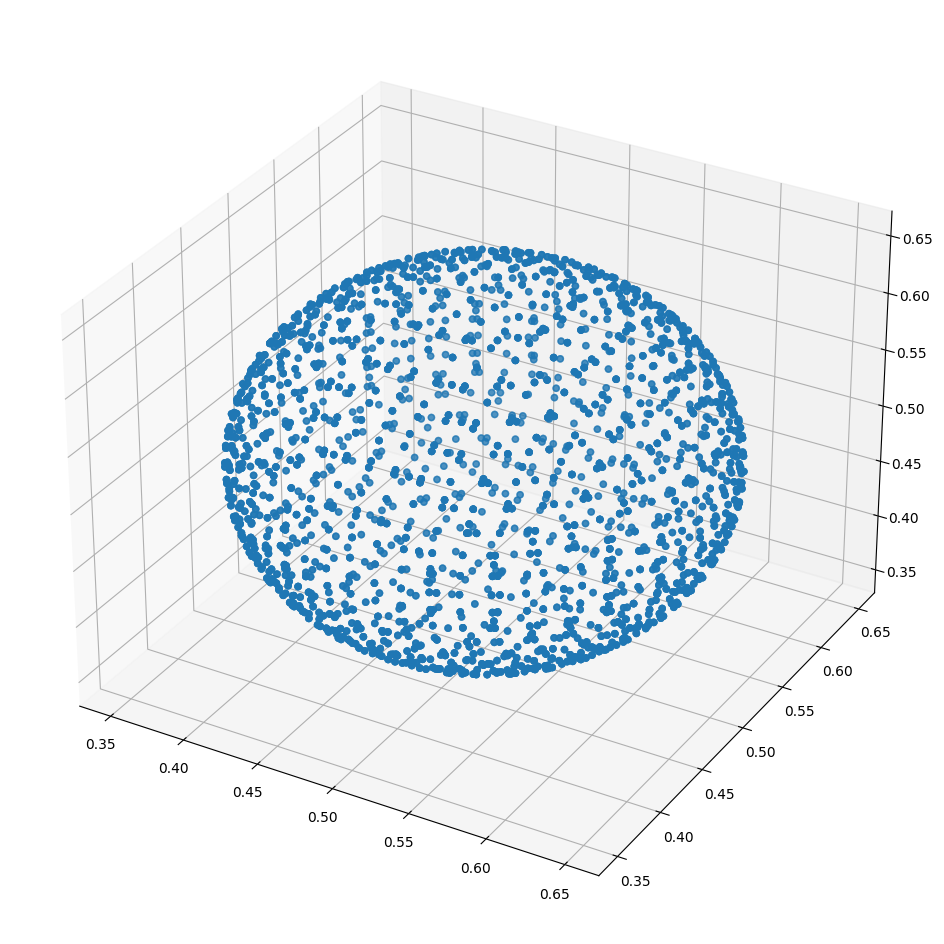

In [34]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

In [44]:
X = []
HC = Complex(3)
for c in corners_and_intersections:
    for xi in c['Intersections']:
        vi = HC.V[tuple(xi)]
        for xj in c['Intersections']:
            vj = HC.V[tuple(xi)]
            vi.connect(vj)
        X.append(xi)
        
X = np.array(X)

In [39]:
HC.V.size()

1758

/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2831: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

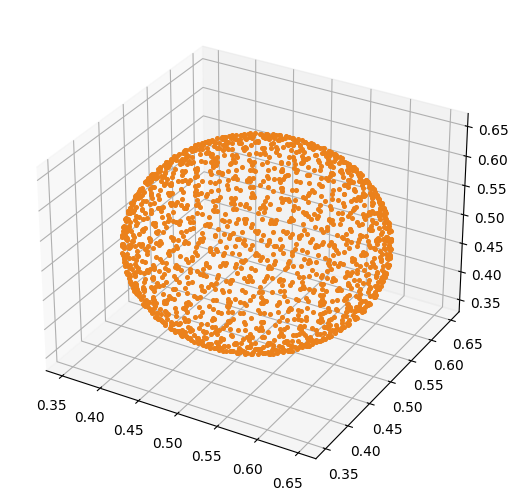

In [45]:
HC.plot_complex()

In [42]:
cdist = 1e-6
HC.V.merge_all(cdist=cdist)

In [43]:
HC.V.size()

1758